In [10]:
# EDA : GOOGLE PLAY

EDA ( exploratory data analysis is process of analyzing , summerizing the data set. )

In [11]:
"""
importing the libraries:

"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

In [12]:
# ------------------------- IMPORTING THE DATA SET -----------------------------
df=pd.read_csv('googleplaystore.csv')
display(df.head(5))
display(df.columns)
display(df.describe()) # ALSO CALLED AS 5 POINT SUMMARY . IT GIVES STATISTICAL INFORMATION ABOUT NUMERICAL COLUMN.FOR ALL COLUMN
display(df.describe(include='all'))
# ------------------- REMOVING DUPLICATE VALUE ----------------------
display(df.duplicated().sum())
df=df.drop_duplicates()
display(df.duplicated().sum())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


np.int64(483)

np.int64(0)

In [13]:
display(df.dtypes) # ALL COLUMN DATA TYPE TOGETHER
# FOR ONE COLUMN
display(df['App'].dtypes)
display(df['Reviews'].dtypes)
# IF A COLUMN CONTAIN ALL NUMERICAL DATA THEN IT IS INTEGER BUT IF A SINGLE VALUE IS STR THEN DATA TYPE OF THE COLUMN WOULD BE OBJECT.
# ------------------------- CONVERTING THE DATA TYPES OF COLUMNS ----------------------------
display(type("1")) # THIS SHOW STR DUE TO " " BUT INSIDE THIS IT IS INTERGER 
display("1".isnumeric()) # TRUE
display(df[~df['Reviews'].str.isnumeric()]) # ~ is known as tilda
# -------------------------- RESETING THE INDEX -------------------------
df_copy=df.copy(deep=True)
df_copy.reset_index(drop=True,inplace=True)
display(df_copy[~df_copy['Reviews'].str.isnumeric()])
df_copy=df_copy.drop(df_copy.index[9990])
display(df_copy[~df_copy['Reviews'].str.isnumeric()])
df_copy['Reviews']=df_copy['Reviews'].astype(int)
display(df_copy.info())

# ------------------------------- CONVERTING THE SIZE COLUMN INTO INT -------------------------------------
display(df_copy['Size'].unique())
def size_conversion(item):
    if str(item)[-1]=="M":
        res=float(str(item).replace("M",""))
        res=res*1024
        return res
    elif str(item)[-1]=="k":
        res=float(str(item).replace("k",""))
        return res
    else:
        return str(np.nan)
df_copy['Size']=df_copy['Size'].apply(size_conversion)
display(df_copy['Size'].unique())
display(df_copy['Size'].dtype)
df_copy['Size']=df_copy['Size'].astype(float)
display(df_copy['Size'].dtype)
display(df_copy.info())

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

dtype('O')

dtype('O')

str

True

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


None

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

array([19456.0, 14336.0, 8908.8, 25600.0, 2867.2, 5734.4, 29696.0,
       33792.0, 3174.4, 28672.0, 12288.0, 20480.0, 21504.0, 37888.0,
       2764.8, 5632.0, 17408.0, 39936.0, 31744.0, 4300.8, 7168.0, 23552.0,
       6144.0, 6246.4, 4710.4, 9420.8, 5324.8, 11264.0, 24576.0, 'nan',
       9625.6, 15360.0, 10240.0, 1228.8, 26624.0, 8192.0, 8089.6, 57344.0,
       58368.0, 35840.0, 55296.0, 201.0, 3686.4, 5836.8, 8806.4, 2457.6,
       27648.0, 2560.0, 16384.0, 3481.6, 9113.6, 3993.6, 2969.6, 38912.0,
       32768.0, 5529.6, 18432.0, 1126.4, 2252.8, 4608.0, 10035.2, 53248.0,
       9216.0, 6860.8, 30720.0, 2662.4, 7270.4, 3788.8, 22528.0, 7577.6,
       6553.6, 3276.8, 8396.8, 10137.6, 5017.6, 9728.0, 5120.0, 6041.6,
       13312.0, 74752.0, 6963.2, 3584.0, 4096.0, 2355.2, 7372.8, 2150.4,
       43008.0, 7475.2, 9318.4, 56320.0, 23.0, 6656.0, 1536.0, 7680.0,
       52224.0, 41984.0, 49152.0, 8704.0, 47104.0, 8499.2, 4403.2, 4812.8,
       3379.2, 40960.0, 7987.2, 9011.2, 6758.4, 5222.4, 

dtype('O')

dtype('float64')

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


None

In [14]:
# ------------------------------- CONVERTING THE INSTALLS INTO INT -------------------------------------
display(df_copy['Installs'].head(5)) # AS YOU CAN SEE THIS IT IS ALSO A INTERGER COLUMN BUT DUE TO + AND , IT HAS BECAME OBJECT
display(df_copy['Installs'].unique())
df_copy['Installs']=df_copy['Installs'].astype(str)
df_copy['Installs']=df_copy['Installs'].str.replace("+", "").str.replace(",", "")
df_copy['Installs']=df_copy['Installs'].replace("nan",'0')
df_copy['Installs']=df_copy['Installs'].astype(int)
display(df_copy['Installs'].unique())
display(df_copy.info())

# ------------------------------- CONVERTING THE PRICE INTO INT -------------------------------------
df_copy['Price']=df_copy['Price'].astype(str)
display(df_copy['Price'].dtype)
display(df_copy['Price'].unique())
char_to_remove=['+',',','$']
col_to_remove=['Price']
for char in char_to_remove:
    for col in col_to_remove:
        df_copy[col]=df_copy[col].str.replace(char,"")
df_copy['Price']=df_copy['Price'].astype(float)
display(df_copy['Price'].dtype)

# ------------------------------- CONVERTING THE LAST UPDATED ---------------------------------
col_to_drop="Last Updated"
if col_to_drop in df_copy.columns:
    # DISPLAY ORIGINAL DATA
    display(df_copy['Last Updated'].dtype)
    display(df_copy['Last Updated'].unique())
    # CONVERTING INTO DATE TIME
    df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
    display(df_copy['Last Updated'].dtype)
    df_copy['day']=df_copy['Last Updated'].dt.day
    df_copy['month']=df_copy['Last Updated'].dt.month
    df_copy['year']=df_copy['Last Updated'].dt.year
    # DROPPING THE COLUMN
    df_copy=df_copy.drop(columns=[col_to_drop])
else:
    print(f"column {col_to_drop} does not exist . no action taken")
display(df_copy)

# ------------------------------------- CHANGING THE COLUMN ANDROID VERSION ---------------------------------------
display(df_copy['Android Ver'].unique())
df_copy['Android Ver']=df_copy['Android Ver'].str.replace("and up","").str.replace("Varies with device","").str.replace("nan","")

#------------------------------- DROPING DUPLICATE APP -------------------------------------
df_copy[df_copy.duplicated('App')]
df_copy=df_copy.drop_duplicates(subset=["App"],keep="first")
display(df_copy[df_copy.duplicated('App')])
df_copy.columns

# CATEGORICAL FEATURE 
categorical_featue=[feature for feature in df_copy.columns if df_copy[feature].dtype=='O']
# STORES ALL OBJECT DATA TYPE COLUMN IN LIST FORMAT
display(categorical_featue)
numerical_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype!='O']
display(numerical_feature)
display(df_copy[categorical_featue])
display(df_copy[numerical_feature])

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


None

dtype('O')

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

dtype('float64')

dtype('O')

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

dtype('<M8[ns]')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,25,7,2017
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,1.0,4.1 and up,6,7,2018
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,20,1,2017
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,19,1,2015


array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year


['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month', 'year']

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4
...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,1.48,4.1
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,1.0,4.1
10355,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,1.0,2.2
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,Varies with device,


,Rating,Reviews,Size,Installs,Price,day,month,year
0,4.1,159,19456.0,10000,0.0,7,1,2018
1,3.9,967,14336.0,500000,0.0,15,1,2018
2,4.7,87510,8908.8,5000000,0.0,1,8,2018
3,4.5,215644,25600.0,50000000,0.0,8,6,2018
4,4.3,967,2867.2,100000,0.0,20,6,2018
...,...,...,...,...,...,...,...,...
10353,4.5,38,54272.0,5000,0.0,25,7,2017
10354,5.0,4,3686.4,100,0.0,6,7,2018
10355,NaN,3,9728.0,1000,0.0,20,1,2017
10356,4.5,114,NaN,1000,0.0,19,1,2015


EXPLORATORY DATA ANALYSIS OF CATEGORICAL FEATURE

Type
Free    92.172292
Paid     7.827708
Name: proportion, dtype: float64

App: App
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
Pixel Draw - Number Art Coloring Book                 0.010353
                                                        ...   
Sya9a Maroc - FR                                      0.010353
Fr. Mike Schmitz Audio Teachings                      0.010353
Parkinson Exercices FR                                0.010353
The SCP Foundation DB fr nn5n                         0.010353
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Name: proportion, Length: 9659, dtype: float64
Category: Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
L

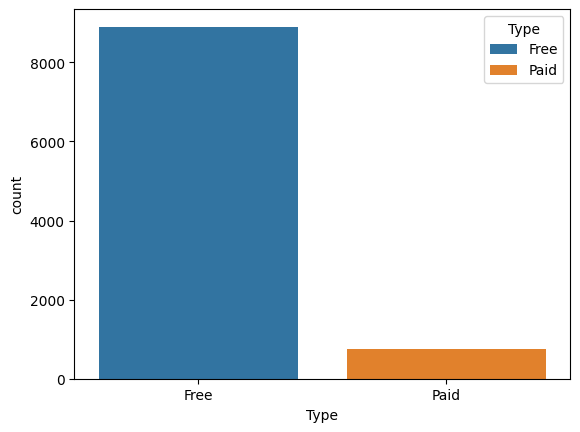

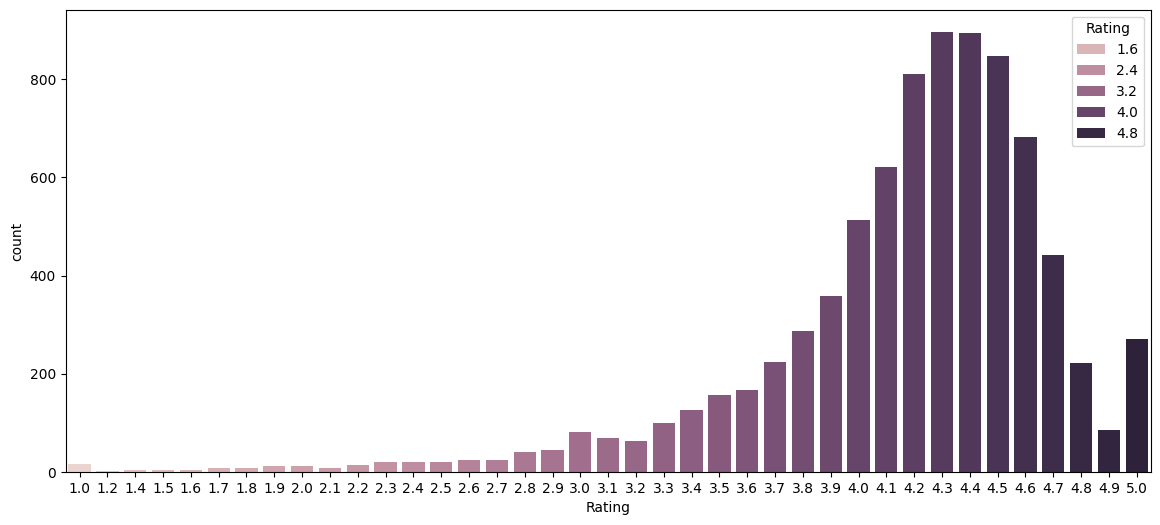

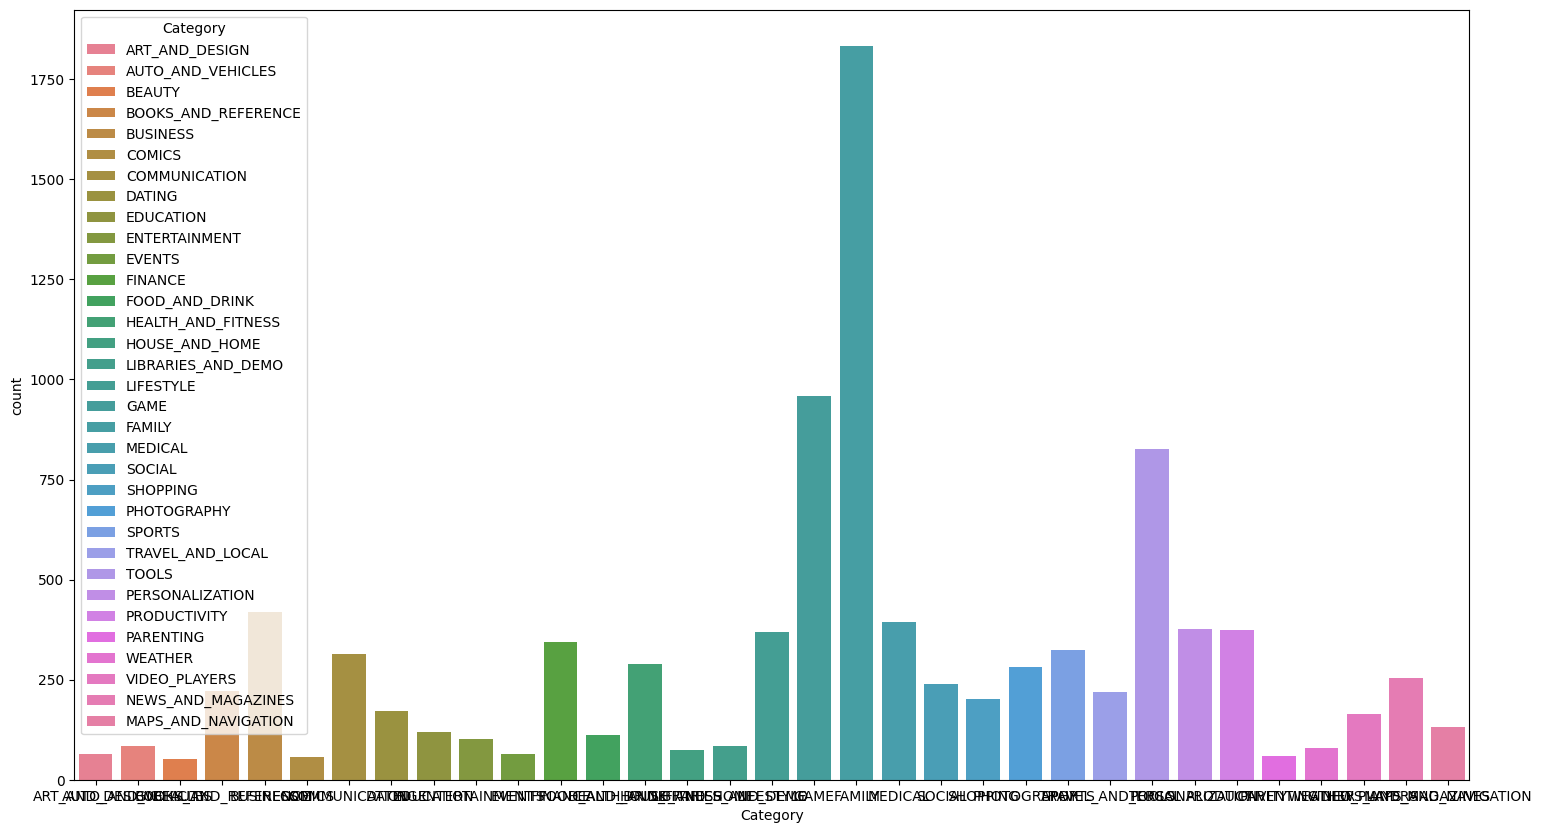

In [33]:
display(df_copy['Type'].value_counts(normalize=True)*100)
# VALUE COUNTS OF ALL COLUMN OF df_copy
for col in df_copy.columns:
    print(f"{col}: {df_copy[col].value_counts(normalize=True)*100}")

# ------------------------------- PLOTTING ----------------------------------
# countplot
sns.countplot(x='Type',data=df_copy,hue='Type',legend=True)
plt.figure(figsize=(14,6))
sns.countplot(x='Rating',data=df_copy,hue='Rating',legend=True)
plt.show()
plt.figure(figsize=(18,10))
sns.countplot(x='Category',data=df_copy,hue='Category',legend=True)
plt.show()
